In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:

f_carrier = 8431016530.864169


In [3]:
data = np.fromfile('/media/scott/fast/data/20201126/ettus_tw1.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

In [4]:
data1 = np.fromfile('/media/scott/fast/data/20201126/bladerf2_tw1.dat', sep = ' ').reshape((-1,4))
t_data1 = Time(data1[:,0], format = 'mjd')
freq_data1 = data1[:,1]

In [5]:
gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_tcm3.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

In [6]:
rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)



In [7]:
rangerate_interp = np.interp(t_data1.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat1 = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff1 = freq_data1 - freq_gmat1
np_diff1 = np.array(freq_diff1)

In [8]:
x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)
print(corrected_carrier)

8431016530.864136


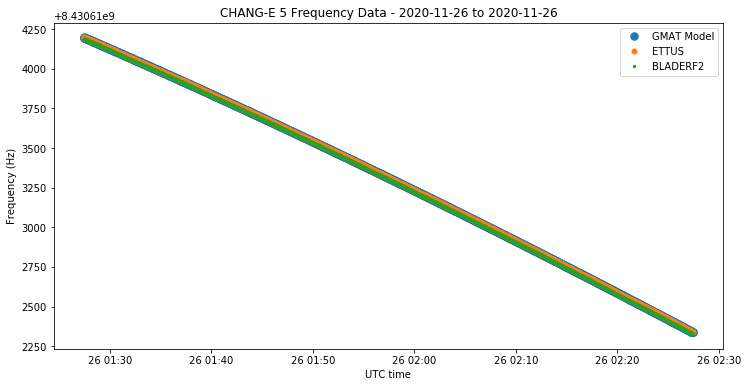

In [18]:
plt.plot(t_data.datetime, freq_gmat, '.',markersize=15,alpha=1,label = 'GMAT Model')
plt.plot(t_data.datetime,freq_data,'.' ,markersize=10, alpha=1, label = 'ETTUS')
plt.plot(t_data.datetime,freq_data1,'.' ,markersize=5, alpha=1, label = 'BLADERF2')

plt.title('CHANG-E 5 Frequency Data - %s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

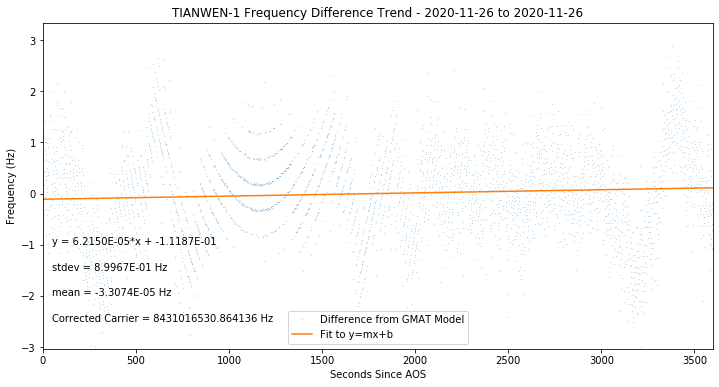

In [10]:
plt.ylim(np.min(np_diff), np.max(np_diff))
#plt.ylim(-4, 4)
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.2, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(50,np.mean(np_diff)-1, 'y = %.4E*x + %.4E'%(m,b))
plt.text(50,np.mean(np_diff)-1.5, 'stdev = %.4E Hz'%np.std(np_diff))
plt.text(50,np.mean(np_diff)-2, 'mean = %.4E Hz'%np.mean(np_diff))
plt.text(50,np.mean(np_diff)-2.5,'Corrected Carrier = %.6f Hz'%corrected_carrier)
plt.title('TIANWEN-1 Frequency Difference Trend - %s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.show();


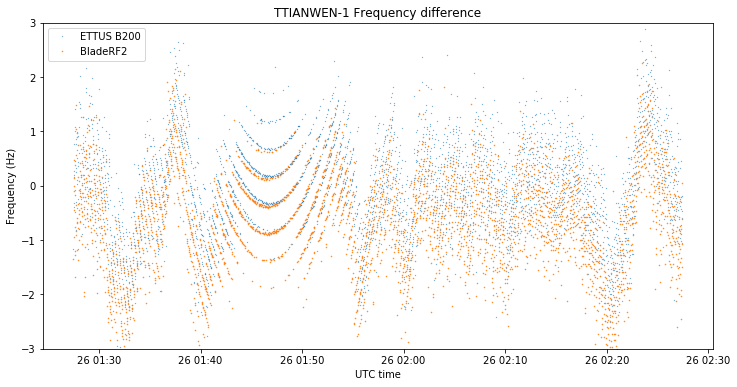

In [12]:
plt.ylim(-3,3)
plt.plot(t_data.datetime, freq_data - freq_gmat,'.',markersize=.5,  label = 'ETTUS B200')
plt.plot(t_data.datetime, freq_data1- freq_gmat1,'.',markersize=1,label = 'BladeRF2')
plt.title('TTIANWEN-1 Frequency difference')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();